In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("Housing_price_data_set.csv")
df['num_airco']=df.airco.map({'yes':1,'no':0})
df['num_fullbase']=df.fullbase.map({'yes':1,'no':0})
df['num_gashw']=df.gashw.map({'yes':1,'no':0})
df['num_driveway']=df.driveway.map({'yes':1,'no':0})
df['num_recroom']=df.recroom.map({'yes':1,'no':0})
df['num_prefarea']=df.prefarea.map({'yes':1,'no':0})
X=df[['lotsize','bedrooms','bathrms','stories','num_driveway','num_recroom','num_fullbase','num_gashw','num_airco','garagepl','num_prefarea']].values
Y=df[['price']].values

# Normalization is done here
X=(X-np.mean(X))/np.std(X)
Y=(Y-np.mean(Y))/np.std(Y)
m=df['lotsize'].count()

#printing number of rows

print("No. of rows : ",m)

No. of rows :  546


In [9]:
# Intializing the parameters with zero
theta = np.matrix(np.zeros(12))

# Splitting the training and test data using train_test_split

from sklearn.model_selection import train_test_split
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=50,test_size=.3)



#set gradient parameters
alpha = [0.1,0.03]
iters = 1000
print(theta)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [10]:
m = len(X)
def gradient_descent(X,Y,theta,iters,alpha):
    cost=[]
    for i in range(0,iters):
        hypo=X*theta.T
        error=hypo-Y
        ie = np.sum(np.power(error,2))
        cost.append(ie/(2*m))
        gradient=(error.T*X)/m
        theta=theta-(alpha*gradient)
    return theta,cost

parameters after gradient descent= [[-0.61091344  0.39245601  0.18560983  0.18659032  0.19251586  0.17920666
   0.18069675  0.17988942  0.17798045  0.18438004  0.18434518  0.18103322]]
parameters after gradient descent= [[-0.61606843  0.39144044  0.18042739  0.18116219  0.18277396  0.17905148
   0.17965533  0.17931572  0.17883456  0.18075424  0.1807737   0.17975492]]


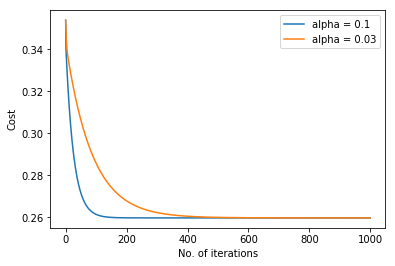

In [11]:
cost_list = []
para_list = []
for a in alpha:
    para,cost=gradient_descent(x_train,y_train,theta,iters,a)
    print("parameters after gradient descent=",para)
    cost_list.append(cost)
    para_list.append(para)
    
it=np.arange(0,iters)
plt.plot(it,np.array(cost_list[0]),label="alpha = 0.1")
plt.plot(it,np.array(cost_list[1]),label="alpha = 0.03")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [12]:
##calculating sum of the squared error after 1000 epochs
hypo=np.matmul(X,np.transpose(para_list[0]))
diff=hypo - Y
diff=np.power(diff,2)
error = np.mean(diff)/2
print("The Squared error for (alpha = 0.1) :",error)
hypo=np.matmul(X,np.transpose(para_list[1]))
diff=hypo - Y
ie=np.power(diff,2)
error = np.mean(ie)/2
print()
print("The Squared error for(alpha = 0.03):",error)

The Squared error for (alpha = 0.1) : 0.35637255518437705

The Squared error for(alpha = 0.03): 0.3563890015813656
